In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import glob
import requests
import json

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
cd data

/Users/miyainnyc/Desktop/research/data


In [3]:
list_data = []
for i in glob.glob('*.csv'):
    data = pd.read_csv(i,index_col = 0)
    data['coin'] = i.split('.')[0]
    data['Close**'] = data['Close**'].apply(lambda x:float(str(x).replace(',','')))
    list_data.append(data)

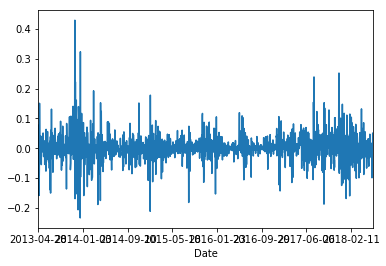

In [4]:
data = pd.concat(list_data).pivot(index='Date', columns='coin', values='Close**')
data.pct_change()['bitcoin'].plot()

In [5]:
print(data.shape)

(1877, 833)


In [6]:
def feature_engineering(data):
    
    """
    create weekly_std,weekly_mean,monthly_std,monthly_std,shift1_,shift2_,shift3_,shift4_
    
    ratio of missing values
    
    """
    
    data_useful = data[(data.isnull().sum()).to_frame().sort_values(0)[0][
        (data.isnull().sum()).to_frame().sort_values(0)[0]<data.shape[0]*4/5].index]
    #data_useful = data_useful.join(data_useful.isnull().add_prefix('nan_')) #label nan
    #data_useful.fillna(0)
    data_useful = data_useful.apply(lambda x:np.log(x)-np.log(x.shift(1))) #log return
    nnull = data_useful.isnull().sum(axis = 1).shift(1)/data_useful.shape[1]
#data_useful.std(axis = 1)
    weekly_std = pd.rolling_std(data_useful.shift(1),window = 5,min_periods = 1).add_prefix('weekly_std_') # one week
    weekly_mean = pd.rolling_mean(data_useful.shift(1),window = 5,min_periods = 1).add_prefix('weekly_mean_')# one week
    monthly_std = pd.rolling_std(data_useful.shift(1),window = 20,min_periods = 1).add_prefix('monthly_std_')# one month
    monthly_mean = pd.rolling_mean(data_useful.shift(1),window = 20,min_periods = 1).add_prefix('monthly_mean_')
    
    #pd.rolling_std(data_useful,window = 20)

    data_useful = data_useful.dropna(axis = 0, how='all').fillna(0)
    data_useful = data_useful.join(data_useful.shift(1).add_prefix('shift1_')).join(
        data_useful.shift(2).add_prefix('shift2_')).join(
        data_useful.shift(3).add_prefix('shift3_')).join(
        data_useful.shift(4).add_prefix('shift4_')).join(data_useful.shift(5).add_prefix('shift5_'))
    
    data_useful = data_useful.join(weekly_std).join(weekly_mean).join(monthly_std).join(monthly_mean)
    data_useful['nnull'] = nnull
    print(data_useful.shape)
    
    return data_useful
    

In [7]:
data_useful = feature_engineering(data)

data_useful

/Users/miyainnyc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,min_periods=1,center=False).std()
/Users/miyainnyc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,min_periods=1,center=False).mean()
/Users/miyainnyc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,min_periods=1,center=False).std()
/Users/miyainnyc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,min_p

(1876, 5661)


coin,namecoin,litecoin,bitcoin,peercoin,novacoin,feathercoin,terracoin,bitbar,worldcoin,digitalcoin,...,monthly_mean_qtum,monthly_mean_digital-money-bits,monthly_mean_sumokoin,monthly_mean_theresa-may-coin,monthly_mean_zencash,monthly_mean_version,monthly_mean_project-x,monthly_mean_metaverse,monthly_mean_eboostcoin,nnull
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-29,0.180819,0.006873,0.074151,0.056179,0.094240,0.000000,0.092650,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2013-04-30,0.120286,-0.018434,-0.039082,-0.085650,-0.080221,0.000000,-0.051377,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.989399
2013-05-01,-0.214845,-0.123614,-0.172385,-0.150408,-0.158025,0.000000,-0.170325,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.989399
2013-05-02,-0.122962,-0.120088,-0.106130,-0.146798,-0.108990,0.000000,-0.075734,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.989399
2013-05-03,-0.155487,-0.103055,-0.073545,-0.058567,-0.095310,0.000000,0.069423,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.989399
2013-05-04,0.146097,0.135175,0.140540,0.125560,0.151289,0.018316,0.053843,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.989399
2013-05-05,0.081493,0.031120,0.029861,0.018475,0.055725,-0.362917,-0.048611,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.984099
2013-05-06,-0.157290,-0.063239,-0.031640,-0.206356,-0.117783,-0.555153,-0.267621,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.984099
2013-05-07,-0.025604,-0.011940,-0.007149,-0.002614,0.003044,0.200885,0.010777,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.984099


In [65]:
r = requests.get('http://localhost:3000/history?ticker='+'MSDLUS Index')
content = json.loads(r.text)['data']
list_currency = []
list_date_currency = []
        
for key in content.keys():
    
    try:
        a = content[key]['PX_LAST']
        list_currency.append(a)
        list_date_currency.append(key)
            
    except KeyError:
        pass
            
currency = pd.DataFrame({'Date':list_date_currency,
                         'US equity market':list_currency})
currency['Date'] = pd.to_datetime(currency['Date'],format='%m/%d/%Y')
currency['US equity market'] = currency['US equity market'].astype(float)
data.pct_change().join(
    currency.set_index('Date').sort_index().pct_change()
    ,how = 'left').replace([np.inf, -np.inf], np.nan).to_csv('/Users/miyainnyc/Desktop/research/crypto_equity.csv')

(1841, 870)


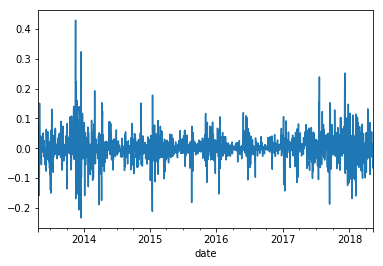

In [8]:
data_pivot = data.pivot(index='date', columns='name', values='close')
print(data_pivot.shape)
data_pivot['bitcoin'].pct_change().plot()

In [17]:
data_pivot.rolling(window = 30).std()

name,1337coin,2give,42-coin,808coin,8bit,abjcoin,ac3,acchain,aces,achain,...,zephyr,zero,zetacoin,zetamicron,zilbercoin,zoin,zonecoin,zozocoin,zsecoin,zurcoin
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data.set_index(['date','name'])['close']

date        name      
2018-05-12  bitcoin       8504.890000
2018-05-11  bitcoin       8441.490000
2018-05-10  bitcoin       9043.940000
2018-05-09  bitcoin       9325.180000
2018-05-08  bitcoin       9234.820000
2018-05-07  bitcoin       9373.010000
2018-05-06  bitcoin       9654.800000
2018-05-05  bitcoin       9858.150000
2018-05-04  bitcoin       9700.760000
2018-05-03  bitcoin       9743.860000
2018-05-02  bitcoin       9235.920000
2018-05-01  bitcoin       9119.010000
2018-04-30  bitcoin       9240.550000
2018-04-29  bitcoin       9419.080000
2018-04-28  bitcoin       9348.480000
2018-04-27  bitcoin       8987.050000
2018-04-26  bitcoin       9281.510000
2018-04-25  bitcoin       8845.740000
2018-04-24  bitcoin       9697.500000
2018-04-23  bitcoin       8930.880000
2018-04-22  bitcoin       8802.460000
2018-04-21  bitcoin       8895.580000
2018-04-20  bitcoin       8845.830000
2018-04-19  bitcoin       8294.310000
2018-04-18  bitcoin       8163.420000
2018-04-17  bitcoin       7